In [75]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [76]:
df = pd.read_csv('realest.csv')

In [77]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [79]:
df.dropna(inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      128 non-null    float64
 1   Bedroom    128 non-null    float64
 2   Space      128 non-null    float64
 3   Room       128 non-null    float64
 4   Lot        128 non-null    float64
 5   Tax        128 non-null    float64
 6   Bathroom   128 non-null    float64
 7   Garage     128 non-null    float64
 8   Condition  128 non-null    float64
dtypes: float64(9)
memory usage: 10.0 KB


In [81]:
df.describe()


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,56.718750,3.195312,1109.382812,6.531250,32.664062,925.476562,1.488281,0.812500,0.226562
std,13.348708,1.392096,480.844011,1.724933,8.630907,435.174559,0.548674,0.810852,0.420252
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,809.750000,5.000000,25.000000,679.750000,1.000000,0.000000,0.000000
50%,56.000000,3.000000,963.500000,6.000000,30.000000,855.500000,1.500000,1.000000,0.000000
75%,64.000000,4.000000,1199.500000,7.000000,35.500000,1039.750000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


<AxesSubplot: >

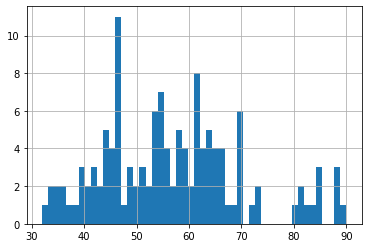

In [82]:
df['Price'].hist(bins=50)

In [83]:
stat = df[(df['Bathroom'] ==2) & (df['Bedroom'] == 4)]['Tax'].describe()

In [132]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


def analyse_and_fit_lrm(path):
    # Load the dataset into a pandas DataFrame
    data = pd.read_csv(path)
    data.dropna(inplace=True)
    # Compute summary statistics for Tax for houses with two bathrooms and four bedrooms
    tax_stats = data[(data['Bathroom'] == 2) & (data['Bedroom'] == 4)]['Tax'].describe()

    # Filter observations for which Space is bigger than 800, ordered by decreasing Price
    filtered_data = data[data['Space'] > 800].sort_values('Price', ascending=False)

    # Compute the 4th 5-quantile of Lot and count the number of observations for which Lot is greater or equal to it
    lot_quantile = np.quantile(data['Lot'], 0.8)
    lot_count = (data['Lot'] >= lot_quantile).sum()

    # Fit a linear regression model with Price as the response variable and other variables as predictors
    X = data[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']]
    y = data['Price']
    model = LinearRegression()
    model.fit(X, y)
    # Extract the model parameters and make a price prediction for a new observation
    params = pd.Series(model.coef_, index=X.columns)
    new_obs = pd.DataFrame({'Bedroom': 3, 'Space': 1500, 'Room': 8, 'Lot': 40, 'Tax': 1000, 'Bathroom': 2, 'Garage': 1, 'Condition': 0}, index=[0])
    new_obs = new_obs[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition']]
    pred_price = model.predict(new_obs)

    # Return the results as a named list
    return {
        'summary_list': {
            'statistics': tax_stats.values.tolist(),
            'data_frame': filtered_data,
            'number_of_observations': lot_count
        },
        'regression_list': {
            'model_parameters': params.values,
            'price_prediction': pred_price[0]
        }
    }

In [133]:
res = analyse_and_fit_lrm('realest.csv')

In [135]:
res

{'summary_list': {'statistics': [8.0,
   845.75,
   171.97736562034635,
   554.0,
   811.5,
   918.0,
   961.25,
   975.0],
  'data_frame':      Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
  114   90.0      8.0  2293.0  12.0  50.0  1181.0       3.0     2.0        0.0
  36    88.0      8.0  2278.0  12.0  50.0  1183.0       3.0     2.0        0.0
  140   88.0      7.0  2277.0  12.0  50.0  1248.0       3.0     2.0        0.0
  88    88.0      8.0  2228.0  12.0  50.0  1208.0       3.0     2.0        0.0
  62    85.0      7.0  2295.0  12.0  50.0  1233.0       3.0     2.0        0.0
  ..     ...      ...     ...   ...   ...     ...       ...     ...        ...
  19    35.0      4.0  1137.0   7.0  25.0   561.0       1.5     0.0        0.0
  45    35.0      5.0  1142.0   7.0  25.0   543.0       1.5     0.0        0.0
  71    34.0      4.0  1095.0   7.0  25.0   530.0       1.5     0.0        0.0
  97    34.0      4.0  1087.0   7.0  25.0   584.0       1.5     0.0     